# Assignment 1 - Solution
#### (Intermediate - Advanced)

This is the third assignment of DPhi 5 Week Data Science Bootcamp that revolves around Data Science Problem solving.

# Agenda
*  Problem Statement
  *  Objective
  *  Dataset & Data Description
*  Solution Steps:
  *  Load data
  *  Understand your data: Data Analysis and Visualizations (EDA)
  *  Pre-process the data
  *  Prepare train and test datasets
  *  Choose a model
  *  Train your model
  *  Evaluate the model (F1-score calculation)
  *  Optimize: repeat steps 5 - 7
*  Conclusion
*  Prediction on New Test data
  *  Load the new test data
  *  Fill missing values if any
  *  Preprocessing and cleaning the data
  *  Predict the target values

## Problem Statement
### Objective
A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

### Dataset & Data Description
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

*  Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
*  Survived_1_year == 1, implies that the patient survived after 1 year of treatment

To load the dataset in your jupyter notebook, use the below command:


```
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')
```


#### Data Description:

*  ID_Patient_Care_Situation: Care situation of a patient during treatment
*  Diagnosed_Condition: The diagnosed condition of the patient
*  ID_Patient: Patient identifier number
*  Treatment_with_drugs: Class of drugs used during treatment
*  Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
*  Patient_Age: Age of the patient
*  Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
*  Patient_Smoker: If the patient was a smoker or not
*  Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
*  Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

## Solution steps:
1. Load data
2. Data Preparation
3. Understand your data: EDA
4. Pre-process the data 
5. Prepare train and test datasets
6. Choose a model
7. Train your model
8. Evaluate the model (F1-score calculation)
9. Optimize: repeat steps 5 - 7


### **Load Libraries**

In [ ]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

### **Load Data**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [ ]:
# Take a look at the first five observations
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


We can see above the column - 'Treated_with_drugs' has two different value representing the same drug i.e. DX6 & dx6 are same drugs. This indicates that data preparation is required here. Let's see other categorical columns.

### Data Preparation

In [ ]:
data.Treated_with_drugs.value_counts()

DX6                     4812
DX6                     2383
DX5                     1153
DX2                     1094
DX4                     1045
                        ... 
DX1 DX2 DX3 DX4 DX5        1
dx1 dx3 dx4 dx5            1
Dx3 dx4 dx5                1
Dx1 dx2 dx3 dx4            1
dx1 dx2 dx3 dx5            1
Name: Treated_with_drugs, Length: 182, dtype: int64

Let's convert all the values in the column - 'Treated_with_drugs' to upper case

In [ ]:
data['Treated_with_drugs'] = data['Treated_with_drugs'].str.upper()

In [ ]:
data.Patient_Smoker.value_counts()

NO             10511
YES             7833
NO              3891
YES             2710
YESS             100
YESS              26
Cannot say         4
Cannot say         2
CANNOT SAY         1
CANNOT SAY         1
Name: Patient_Smoker, dtype: int64

There should be three category here - NO, YES, and Cannot say

In [ ]:
def smoker(r):
  if (r == "NO") or (r == "NO "):
    return 'NO'
  elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
    return 'YES'
  else:
    return 'Cannot say'

data.Patient_Smoker = data.Patient_Smoker.apply(smoker)  # Applying the function to all the entries of Patient_Smoker column

In [ ]:
data.Patient_Rural_Urban.value_counts()

RURAL    17482
URBAN     7597
Name: Patient_Rural_Urban, dtype: int64

In [ ]:
data.Patient_mental_condition.value_counts()

Stable    25079
Name: Patient_mental_condition, dtype: int64

There are no same value in different format in columns - 'Patient_Rural_Urban' and 'Patient_mental_condition'. So no data preparation required here. Now our dataset is good to go for EDA.

### **EDA** 

Primary screenings: 
1. Get a look at the data, its columns and kind of values contained in these columns: df.head()
2. Stepping back a bit, get a look at the column overview: number, types, NULL counts: df.info()

In [ ]:
# A concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Treated_with_drugs         25071 non-null  object 
 4   Patient_Age                25079 non-null  int64  
 5   Patient_Body_Mass_Index    25079 non-null  float64
 6   Patient_Smoker             25079 non-null  object 
 7   Patient_Rural_Urban        25079 non-null  object 
 8   Patient_mental_condition   25079 non-null  object 
 9   A                          23723 non-null  float64
 10  B                          23723 non-null  float64
 11  C                          23723 non-null  float64
 12  D                          23723 non-null  float64
 13  E                          23723 non-null  flo

**Observations:**

1. There are 23097 observations divided into 17 columns.
2. There are some missing values in the dataset.


Let's take a look at the distribution of our target variable to determine if we have a balanced dataset


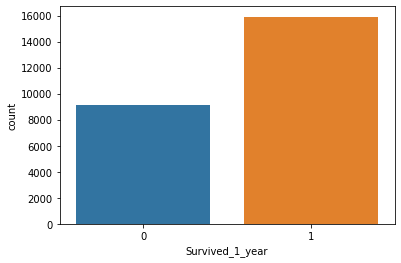

In [ ]:
sns.countplot(x='Survived_1_year', data=data)
plt.show()

There are 8000 + patients who did not survive after 1 year of treatment and 14000 + patients who survived after 1 year of treatment. The ratio is 1:2 (approx). So there is no class imbalance

Next, we will perform EDA on our continuous variables

---



In [ ]:
# getting only the numerical features
numeric_features = data.select_dtypes(include=[np.number])    # select_dtypes helps you to select data of particular types 
numeric_features.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [ ]:
numeric_data=data[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond', 'Survived_1_year']]  #keeping in the target varibale for analysis purposes
numeric_data.head()

# ID_Patient_Care_Situation and Patient_ID are just an ID we can ignore them for data analysis.
# Number_of_prev_cond is dependent on 7 columns - A, B, C, D, E, F, Z

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,47,60,21.655523,2.0,1
1,3,2,28.852743,3.0,0
2,7,20,26.179725,2.0,1
3,31,8,22.638945,2.0,0
4,43,53,21.326131,1.0,1


In [ ]:
# Checking the null values in numerical columns
numeric_data.isnull().sum()

Diagnosed_Condition           0
Patient_Age                   0
Patient_Body_Mass_Index       0
Number_of_prev_cond        1356
Survived_1_year               0
dtype: int64

We can see that 1235 values are missing from 'Number_of_prev_cond' column. We will fill these with the mode. 

**Why mode?** As per the data description this column's value is dependent on the seven columns - 'A', 'B', 'C', 'D', 'E', 'F', 'Z'. These columns have values either 0 or 1. Hence these seven columns are categorical columns. So the column 'Number_of_prev_cond' have discrete values from integers 0 to 7 and can be considered as categorical column as it has only 7 different values. Hence here we can fill the missing values with mode.

In [ ]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])  # filling the missing value of 'Number_of_prev_cond'

numeric_data['Number_of_prev_cond']=data['Number_of_prev_cond']
numeric_data.isnull().sum()

# The returned object by using mode() is a series so we are filling the null value with the value at 0th index ( which gives us the mode of the data)

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

In [ ]:
# Taking a look at the basic statistical description of the numerical columns
numeric_data.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000
mean,26.382631,33.193548,23.439952,1.707803,0.634316
std,15.096967,19.507617,3.778849,0.768082,0.481631
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205050,1.000000,0.000000
50%,26.000000,33.000000,23.369168,2.000000,1.000000
75%,40.000000,50.000000,26.730785,2.000000,1.000000
max,52.000000,142.000000,29.999579,5.000000,1.000000


**observations**

1. The minimum and maximum values for all the numerical columns.
2. The mean and median (i.e. 50%) value for all the numerical columns are nearly same, so no outliers.


A good way to visualize the above information would be boxplots.

**Box Plot**

A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.

With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.

It displays the five-number summary of a set of data. The five-number summary is:

*  minimum
*  first quartile (Q1)
*  median
*  third quartile (Q3)
*  maximum

Boxplot also helps you to check if there are any outliers in your data or not.

For reading about boxplot and outliers: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Read more about Box Plots [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

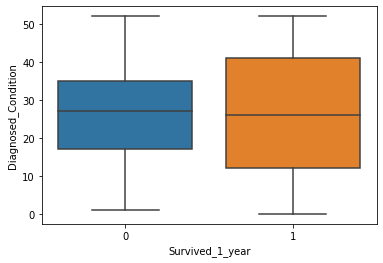

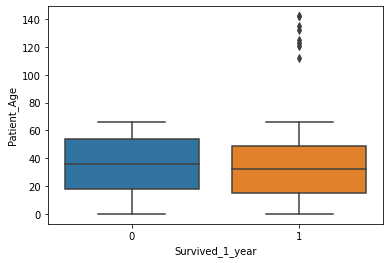

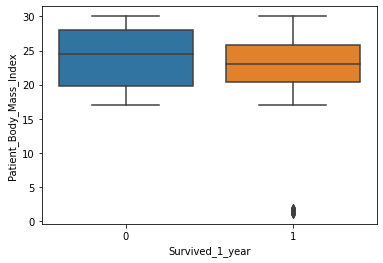

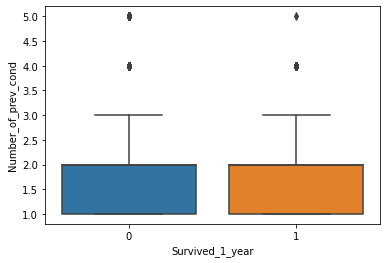

In [ ]:

for feature in numeric_data.drop('Survived_1_year', axis = 1).columns:
  sns.boxplot(x='Survived_1_year', y=feature, data=numeric_data)
  plt.show()

We can also see there are some outliers in the columns - 'Patient_Age', 'Patient_Body_Mass_Index', and 'Number_of_prev_cond'. There are various ways to treat the outliers as mentioned in the article https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba. Here I have not treated any outliers.

Following is a correlation analysis between the continuous varibles, visualized using a heatmap

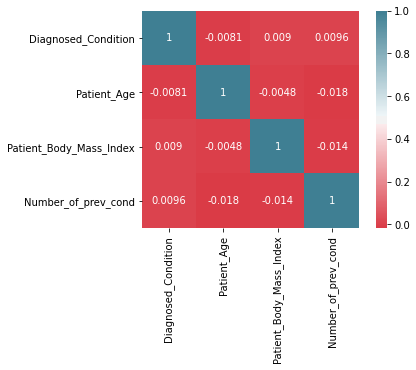

In [ ]:
numeric_data=numeric_data.drop(['Survived_1_year'], axis=1)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(numeric_data.corr(),
            cmap = colormap,
            square = True,
            annot = True)
plt.show()

Finally, we must look at the EDA for our categorical variables. However, before analyzing the categorical columns further, we will treat the missing values

In [ ]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

#### *Filling Missing values*

In [ ]:
data['Treated_with_drugs']=data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [ ]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [ ]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

### EDA on Categorical Data
Let's perform Exploratory Data Analysis on the Categorical data.
In the categorical_data variable we'll keep all the categorical features and remove the others.

Note that the features are not being removed from the main dataset - data. We'll select features with a feature selection technique later.

In [ ]:
categorical_data = data.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.drop(['Patient_ID', 'ID_Patient_Care_Situation'], axis=1, inplace = True)    # dropping the id columns form the dataframe 'categorical data'
categorical_data.head()    # Now we are left with categorical columns only. take a look at first five observaitons

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,DX2,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,DX6,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,DX6,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,DX6,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,DX1,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Now we can look at the distributions of our categorical variables

In [ ]:
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

Treated_with_drugs          64
Patient_Smoker               3
Patient_Rural_Urban          2
Patient_mental_condition     1
A                            2
B                            2
C                            2
D                            2
E                            2
F                            2
Z                            2
Survived_1_year              2
dtype: int64

So 'Treated_with_drugs' column has 32 unique values while 'Patient_Smoker' has only 3 categorical values. 'Patient_mental_condition' column has only 1 categorical value.

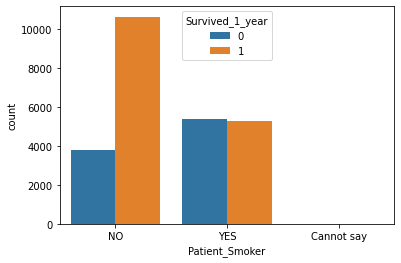

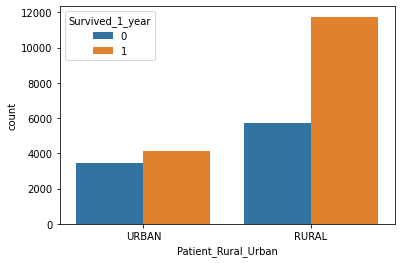

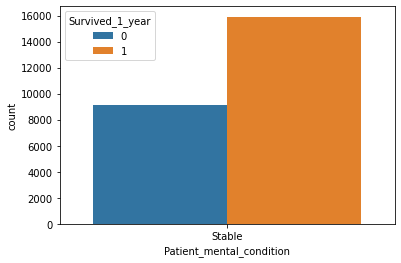

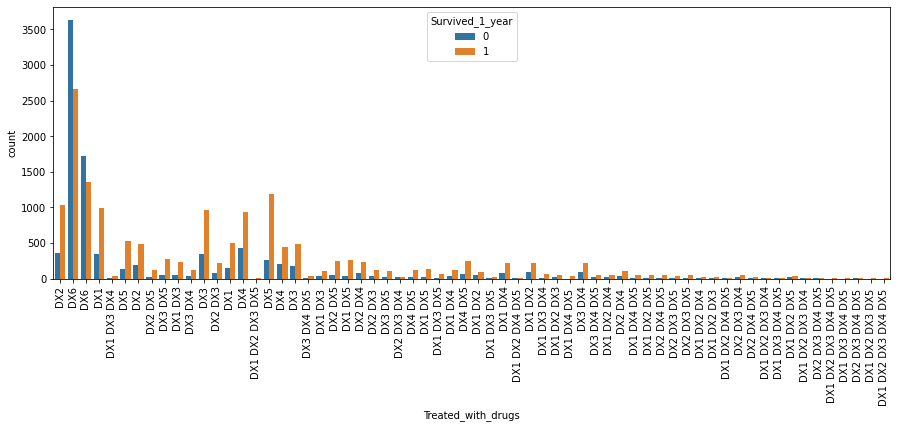

In [ ]:
# Visualization of categorical columns
for feature in ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']:
  sns.countplot(x=feature,  hue='Survived_1_year', data=categorical_data)
  plt.show()


plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=categorical_data)
plt.xticks(rotation=90)
plt.show()


#### **Pre-Processing and Data Cleaning of Categorical Variables**


We have discussed in our sessions that machine learning models accepts only numerical data. 'Treated_with_drugs' column is a categorical column and has values as combination of one or more drugs. Let's split all those combined drugs into individual drugs and create dummies for that.

In [ ]:
drugs = data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,1,0,0,0,0,0


In [ ]:
data = pd.concat([data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
data = data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,16201,47,8433,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,0,0,0
1,9421,3,2972,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,1
2,16205,7,8608,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1
3,5582,31,10074,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
4,20880,43,7462,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0


'Patient_Smoker' is also a categorical column and we need to create dummies for this too. If you observe the data, the column 'Patient_Smoker' has a category 'Cannot say'.

In [ ]:
data.Patient_Smoker.value_counts()

NO            14402
YES           10669
Cannot say        8
Name: Patient_Smoker, dtype: int64

There can be different ways to deal with the category 'Cannot say'. Here we will consider it as missing value and fill those entries with the mode value of the column.

In [ ]:
data.Patient_Smoker[data['Patient_Smoker'] == "Cannot say"] = 'NO'    # we already know 'NO' is the mode so directly changing the values 'Cannot say' to 'NO'

The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'. This feature won’t be useful for making the prediction of the target variable as it doesn’t provide any useful insights of the data. Hence, It is better to remove this kind of features.

In [ ]:
data.drop('Patient_mental_condition', axis = 1, inplace=True)

Now let's convert the remaining categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [ ]:
data = pd.get_dummies(data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [ ]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,16201,47,8433,60,21.655523,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,0,0,0,1,0,0,1
1,9421,3,2972,2,28.852743,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,1,1,0,1,0
2,16205,7,8608,20,26.179725,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1,1,0,1,0
3,5582,31,10074,8,22.638945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1,1,0,1,0
4,20880,43,7462,53,21.326131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,1,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Patient_Age                25079 non-null  int64  
 4   Patient_Body_Mass_Index    25079 non-null  float64
 5   A                          25079 non-null  float64
 6   B                          25079 non-null  float64
 7   C                          25079 non-null  float64
 8   D                          25079 non-null  float64
 9   E                          25079 non-null  float64
 10  F                          25079 non-null  float64
 11  Z                          25079 non-null  float64
 12  Number_of_prev_cond        25079 non-null  float64
 13  Survived_1_year            25079 non-null  int

As you can see there are no missing data now and all the data are of numerical type.

There are two ID columns - 'ID_Patient_Care_Situation' and 'Patient_ID'. We can think of removing these columns if these are randomly generated value and there is not any id repeated like we had done for the 'PassengerId' in Titanic Dataset. 'PassengerId' was randomly generated for each passenger and none of the ids were repeated. So let's check these two ids columns.

In [ ]:
print(data.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(data.Patient_ID.nunique())

23097
10599


You can see there are 23097 unique 'ID_Patient_Care_Situation' and there are 23097 total observations in the dataset. So this column can be dropped.

Now, there are only 10570 unique values in the column 'Patient_ID'. This means there are some patient who came two or more times in the hospital because it is possible the same person was sick for two or more than two times (with different illness) and visited hospital for the treatment. And the same patient will have different caring condition for different diseases. 

So there are some useful information in the column - 'Patient_ID' and thus we will not drop this column.

In [ ]:
data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

### **Prepare Train/Test Data**

1. Separating the input and output variables

Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we can see that whether a person will survive after one year or not, depends on other variables like, age, diagnosis, body mass index, drugs used, etc.

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [ ]:
X = data.drop('Survived_1_year',axis = 1)
y = data['Survived_1_year']

2. Train/test split

We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### **Model Building**

We have seen from Exploratory Data Analysis that this is a classification problem as the target column 'Survived_1_year' has two values 0 - means the patient did not survive after one year of treatment, 1 - means the patient survived after one year of treatment. So we can use classification models for this problem. Some of the classification models are - Logistic Regression, Random Forest Classifier, Decision Tree Classifier, etc. However, we have used two of them - Logistic Regression and Random Forest Classifier.

### 1. Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = model.predict(X_test)

*Evaluation:*

In [ ]:
print(f1_score(y_test,pred))

0.7901923359271766


The f1 score by Logistic Regression model is 79%. Let's try Random Forest Classifier and see if we get better result with it.

### 2. Random Forest

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

##### Evaluating on X_test

In [ ]:
y_pred = forest.predict(X_test)

fscore = f1_score(y_test ,y_pred)
fscore

0.8407117437722419

The f1 score by Random Forest classifier is 84% which is better than logistic regression.

Well there are so many feaures to train the model. We can go and try some feature selection techniques and check if the performance of Random Forest is affected or not. And see if with the decrease in the complexity of model is satisfactory with minimal affect to the performance of the model.

We have used the Boruta feature selector. You can use some other techniques too and see if that is giving better result than Boruta.

### 3. Random Forest and Boruta

**Note:** Before proceeding ahead please revise the feature selection Notebook or the session if you don't remember what is **'Boruta'**.

Boruta is an all-relevant feature selection method. Unlike other techniques that select small set of features to minimize the error, Boruta tries to capture all the important and interesting features you might have in your dataset with respect to the target variable.

Boruta by default uses random forest although it works with other algorithms like LightGBM, XGBoost etc.

You can install Boruta with the command

pip install Boruta

In [ ]:
!pip install Boruta

     |████████████████████████████████| 61kB 1.8MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	3
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=123, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F219108F990,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='a

In [ ]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 2 1 3 4 5 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  18


So boruta has selected 17 relavent features. # Let's visualise it better in the form of a table

#### Displaying features rank wise

In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
15,DX4,1
14,DX3,1
13,DX2,1
12,DX1,1
11,Number_of_prev_cond,1


#### Create a new subset of the data with only the selected features

In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

#### Build the model with selected features

In [ ]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

#### Evaluation

In [ ]:
y_important_pred = rf_important.predict(X_important_test)
rf_imp_fscore = f1_score(y_test, y_important_pred)

In [ ]:
print(rf_imp_fscore)

0.8845614581710547


If you remember from above that the Random Forest Classifier with all the features had given f1 score as 82.2% while after selecting some relavent features the Random Forest Classifier has given f1 score as 88.4% which is a good improvement in terms of bothe performance of the model (i.e. the result) and the complexity is also reduced.

Well we have chosen some of the parameters randomly like max_depht, n_estimators. There are many other parameters related to Random Forest model.If you remember we had discussed in our session 'Performance Evaluation' about Hyper parameter tunning. Hyper parameter tunnning helps you to choose a set of  optimal parameters for a model. So let's try if this helps us to further improve the performance of the model. 

Grid Search helps you to find the optimal parameter for a model.

### Hyper Parameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [ ]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 15, 'n_estimators': 500}

In [ ]:
pred = grid_search.predict(X_important_test)

In [ ]:
f1_score(y_test, pred)

0.8880666049953747

As you can see the accuracy has been improved from 88.4% to 88.8% by selecting some good parameters with the help of hyper parameter tunning - GridSearchCV

# Conclusion
* It is clearly observable that how the f1 scores increased from logistic regression to random forest, random forest with full features to random forest on the selected features using Boruta. 
* Then again the f1 score increased with Hyper parameter tunning.
* Also this is one of the approach to solve this problem. There can be many other approaches to solve this problem.
* We could also try standardizing and normalizing the data or some other algorithms and so on....
* Well you should try standardizing or normalizing the data and then observe the difference in f1 score.
* Also try doing using Decision Tree.


**Now let's predict the output for new test data**

Well, we will predict the output for new test data using the Random Forest model with the selected features using Boruta and also with the best parameters that we got during hyper parmeter tunning because we have got the highest f1 score with this model on **X_test** data (also called the validation data). We can directly use **grid_search** variable to predict as this variable is the reference to the trained model.

## New Test Data
Tasks to be performed:
*  Load the new test data
*  Data Preparation - same as done on training data
*  If missing values are there then fill the missing values with the same techniques that were used for training dataset
*  Convert categorical column to numerical
*  Predict the output
*  Download the predicted values in csv

Why do we need to do the same procedure of filling missing values, data cleaning and data preprocessing on the new test data as it was done for the training and evaluation data?

**Ans:** Because our model has been trained on certain format of data and if we don't provide the testing data of the similar format, the model will give erroneous predictions and the accuracy/f1 score of the model will decrease. Also, if the model was build on 'n' number of features, while predicting on new test data you should always give the same number of features to the model. In this case if you provide different number of features while predicting the output, your ML model will throw a **ValueError** saying something like **'number of features given x; expecting n'**. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results.

In [ ]:
# Load the data
test_new_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_advc.csv")

In [ ]:
# take a look how the new test data look like
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


**Can you observe the new test data here?** It is in the same format as our training data before performing any cleaning and preprocessing.

### Data Preparation - same as we did for training data

In [ ]:
test_new_data.Treated_with_drugs.value_counts()

DX6                1856
DX6                 789
DX1                 416
DX5                 407
DX2                 405
                   ... 
Dx1 dx3 dx4 dx5       1
Dx1 dx3 dx4           1
Dx1 dx3 dx5           1
DX1 DX2 DX4 DX5       1
dx1 dx2 dx3 dx4       1
Name: Treated_with_drugs, Length: 173, dtype: int64

Let's convert all the values in the column - 'Treated_with_drugs' to upper case

In [ ]:
test_new_data['Treated_with_drugs'] = test_new_data['Treated_with_drugs'].str.upper()

In [ ]:
test_new_data.Patient_Smoker.value_counts()

NO       3949
YES      2879
NO       1424
YES      1027
YESS       36
YESS       15
Name: Patient_Smoker, dtype: int64

There should be three category here - NO, YES, and Cannot say

In [ ]:
def smoker(r):
  if (r == "NO") or (r == "NO "):
    return 'NO'
  elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
    return 'YES'
  else:
    return 'Cannot say'

test_new_data.Patient_Smoker = test_new_data.Patient_Smoker.apply(smoker)

In [ ]:
test_new_data.Patient_Rural_Urban.value_counts()

RURAL    6547
URBAN    2783
Name: Patient_Rural_Urban, dtype: int64

In [ ]:
test_new_data.Patient_mental_condition.value_counts()

Stable    9330
Name: Patient_mental_condition, dtype: int64

There are no same value in different format in columns - 'Patient_Rural_Urban' and 'Patient_mental_condition'. So no data preparation required here. Now our dataset is good to go for EDA.

### Checking missing values

In [ ]:
test_new_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

New test data has no missing values. So treating missing value is not required.

#### Preprocessing and data cleaning: same as we did on training data

In [ ]:
drugs = test_new_data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [ ]:
test_new_data = pd.concat([test_new_data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
test_new_data = test_new_data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are splitted into different columns

test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,24206,35,4640,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,1,0
1,32827,30,3214,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0
2,3694,46,3564,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1
3,7164,44,5176,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0
4,1259,30,1101,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1,0


In [ ]:
test_new_data.Patient_Smoker.value_counts()

NO     5373
YES    3957
Name: Patient_Smoker, dtype: int64

This data does not have value as 'Cannot say' in 'Patient_Smoker' column

The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'.

In [ ]:
test_new_data.drop('Patient_mental_condition', axis = 1, inplace=True)

Now let's convert the categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [ ]:
test_new_data = pd.get_dummies(test_new_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [ ]:
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,24206,35,4640,65,20.710365,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,1,0,1,0,1,0
1,32827,30,3214,2,24.250219,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1,0,0,1
2,3694,46,3564,1,27.139276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,1,0,0,1
3,7164,44,5176,29,29.191759,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1,0,1,0
4,1259,30,1101,51,20.844146,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,1,0,1,0,0,1


In [ ]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9330 non-null   int64  
 1   Diagnosed_Condition        9330 non-null   int64  
 2   Patient_ID                 9330 non-null   int64  
 3   Patient_Age                9330 non-null   int64  
 4   Patient_Body_Mass_Index    9330 non-null   float64
 5   A                          9330 non-null   float64
 6   B                          9330 non-null   float64
 7   C                          9330 non-null   float64
 8   D                          9330 non-null   float64
 9   E                          9330 non-null   float64
 10  F                          9330 non-null   float64
 11  Z                          9330 non-null   float64
 12  Number_of_prev_cond        9330 non-null   float64
 13  DX1                        9330 non-null   int64

As you can see there are no missing data now and all the data are of numerical type.

The column - 'ID_Patient_Care_Situation' is an ID. Here we can remove this column too as we did in training dataset.

In [ ]:
test_new_data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

In [ ]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        9330 non-null   int64  
 1   Patient_ID                 9330 non-null   int64  
 2   Patient_Age                9330 non-null   int64  
 3   Patient_Body_Mass_Index    9330 non-null   float64
 4   A                          9330 non-null   float64
 5   B                          9330 non-null   float64
 6   C                          9330 non-null   float64
 7   D                          9330 non-null   float64
 8   E                          9330 non-null   float64
 9   F                          9330 non-null   float64
 10  Z                          9330 non-null   float64
 11  Number_of_prev_cond        9330 non-null   float64
 12  DX1                        9330 non-null   int64  
 13  DX2                        9330 non-null   int64

### Prediction

In [ ]:
imp_test_features = boruta_selector.transform(np.array(test_new_data))

In [ ]:
prediction = grid_search.predict(imp_test_features)

We have the predicted output stored in the variable 'prediction'. Let's download this prediction as csv file as shown below.

## Download the prediction file in csv

In [ ]:
res = pd.DataFrame(prediction)
res.index = test_new_data.index 
res.columns = ["prediction"]
 
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>